# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

### 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [3]:
data.shape

(3864, 19)

In [4]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [5]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

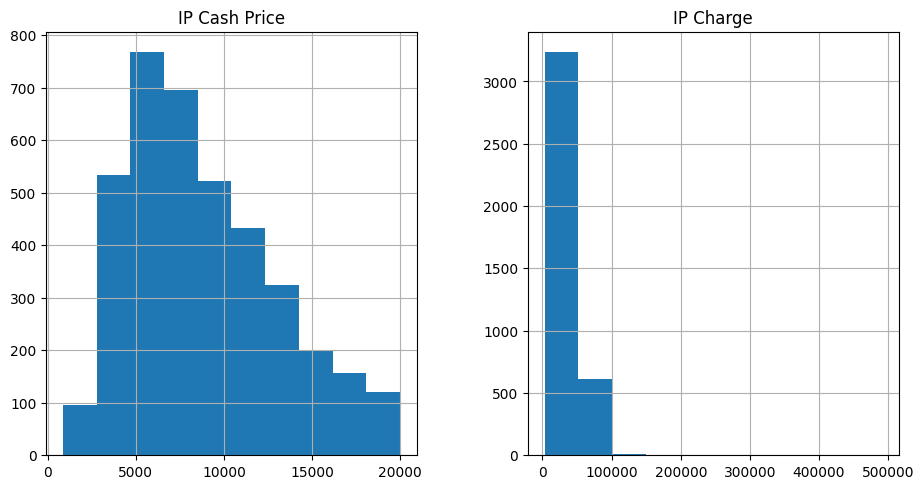

In [6]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

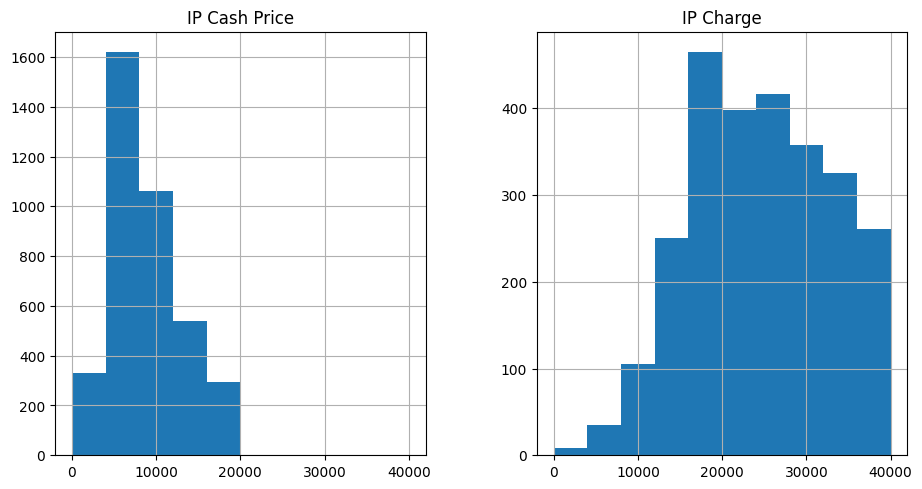

In [7]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [8]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

### YOUR RESPONSE:

The histogram of the IP Cash Price shows that the number of IPs is more or less positively skewed and the most of the IPs are sold in between 5000 and 10000 dollars, with maximum IPs sold at a price range of  5000to 6000. This more extended dissemination of the monetary values demonstrates that for the direct paying patients there remains a relatively generic monetary value structure mainly determined through cash pricing with relatively few instances of extremely high priced service offerings, above the valued15, 000 or extremely low services, below 5,000. The overall range covers from 0 to 20000 which proves that cash pricing has relatively moderate distribution of options.

On the contrary, an histogram of IP Charge based on the same log file presents a much different picture that is skewed heavily to the right and presents maximum value of 500,000 dollars. Where charges are distributed across the range of values, the majority of charges clustered in the 0 TO 50,000 bin and a given charge bin frequency significantly decreases with increase in charge amount. This high cash price together with the variation in charges where the great majority of charges are set quite low but there is a tail of much higher charges, and the skewness of the distribution, supports the inference that whereas cash prices are kept reasonably restrained, the charges provide the opportunity for much higher initial charges which may then be subject to negotiation with insurers etc.
















---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

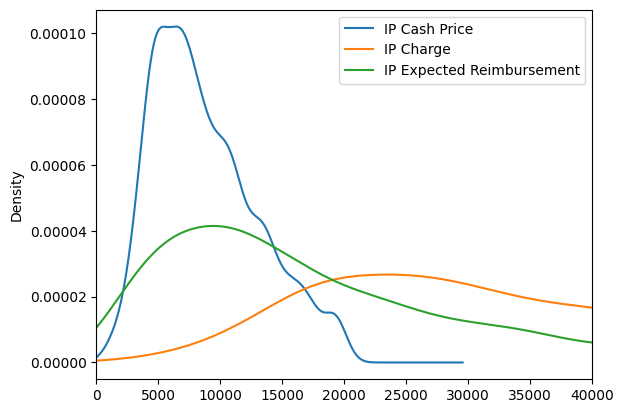

In [9]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

### YOUR RESPONSE:
The KDE plot provides insight into healthcare pricing behavior that is accentuated by a distinct pattern. The IP Cash Price (blue line) presents the highest frequencies at the lowest price, with the distribution shifting to $5000-7000 prices and then they sharply drop. This implies that hospitals have low cash prices for charge master, most probably in order to increase access to health care to the uninsured or for self- payment to providers. However, these cash prices are less dispersed, suggesting that there is actually less difference in what one might guess each of these individual patients will have to pay from out of their own pocket.

IP Charge is again more dispersed and has a number of spikes which are significantly higher than the IP Expected Reimbursement mean. The IP Charge indicates the highest values and variance, which reaches the maximum of  25,000to 30,000, m aximum amount that insurance companies are willing to pay for the services. The IP Expected Reimbursement is located in between these two extremes, indicating the fact that although hospitals charge insurance companies very high amounts for the services provided they expect far less through more reasonable contracts. This pattern constitutes a sophisticated approach to pricing where the most steep tariffs are applied to insurance billing though actual anticipated collection and cash rate are much lower, suggesting insurance bargaining as a component of healthcare costs.














---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [10]:
data['Payer'].value_counts()

,count
Payer,
ALLWELL [15100],650
ARKANSAS TOTAL CARE [40700],650
AETNA [65000],641
AR BLUE CROSS BLUE SHIELD [25001],641
HEALTHSCOPE [95700],641
MULTIPLAN,641


In [11]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

,IP Expected Reimbursement
Payer,
AETNA [65000],372
ALLWELL [15100],519
AR BLUE CROSS BLUE SHIELD [25001],450
ARKANSAS TOTAL CARE [40700],404
HEALTHSCOPE [95700],641
MULTIPLAN,641


,IP Expected Reimbursement
Payer,
AETNA [65000],"Axes(0.125,0.11;0.775x0.77)"
ALLWELL [15100],"Axes(0.125,0.11;0.775x0.77)"
AR BLUE CROSS BLUE SHIELD [25001],"Axes(0.125,0.11;0.775x0.77)"
ARKANSAS TOTAL CARE [40700],"Axes(0.125,0.11;0.775x0.77)"
HEALTHSCOPE [95700],"Axes(0.125,0.11;0.775x0.77)"
MULTIPLAN,"Axes(0.125,0.11;0.775x0.77)"


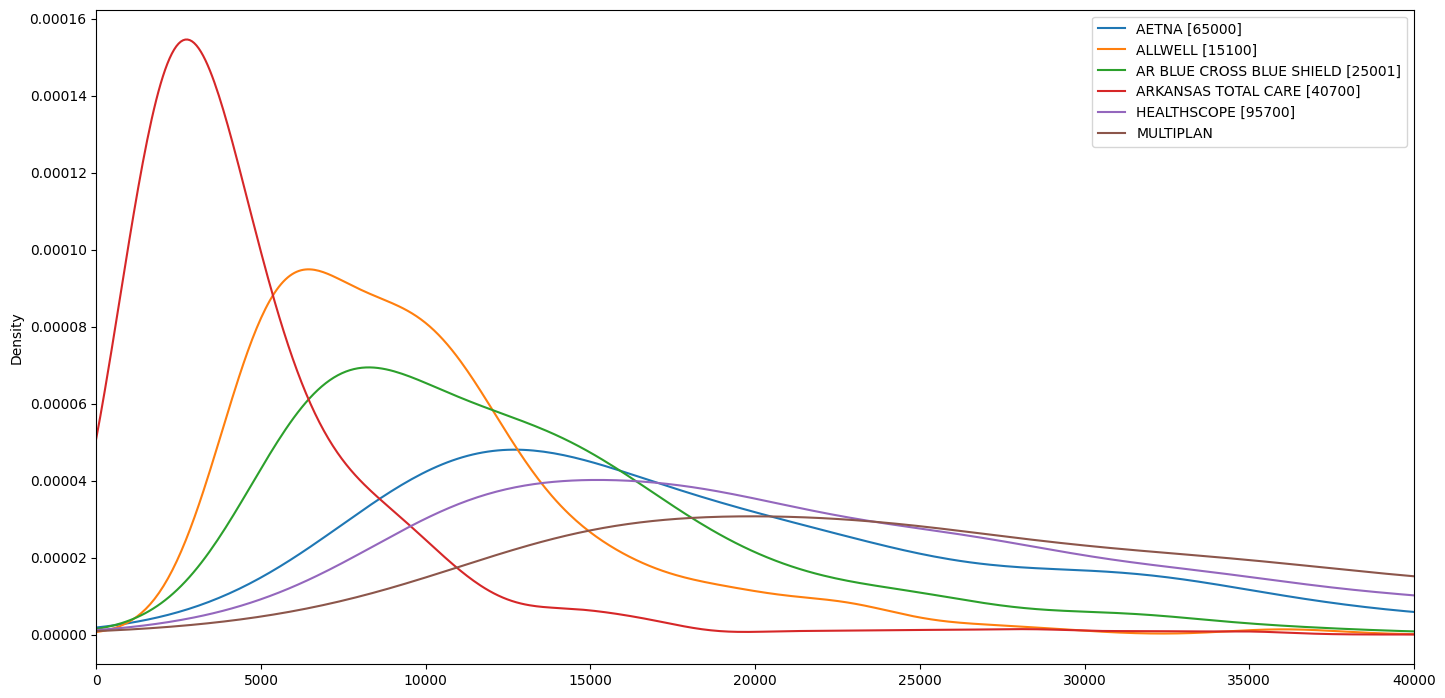

In [12]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


### YOUR RESPONSE:
The KDE plot also shows different reimbursement distribution for different insurance plans, and the peak of Arkansas Total Care (approximately 5000) with the highest density means that they usually have the lowest reimbursement rate relative to other insurers. After this, Allwell and AR Blue Cross Blue Shield have a slightly higher points on the right axis (around  7,000−10,000),whichmeansrelativelyhigheraveragepayments.Ontheotherhand,AETNA,HealthscopeandMultiplanhaveshownmuchhigherbarsbeyond 15,000 with a stretched curve showing that they predominantly provide higher approximate reimbursement rate, however, they fluctuate much in their prices.

These patterns indicate a two-tier reimbursement system in the healthcare market where government related or managed care organization such as Arkansas Total Care have a standardized lower reimbursement rates probably플 due to escalated price regulation or a negotiated lower rate for health care so as to contain the cost. All these aspects show that, for example, AETNA, Healthscope and Multiplan have achieved a higher level of reimbursement rates and adopted more variations in the context of payment for other services The Empirical evidence indicates that commercial insurers have applied varied approaches and higher degrees of freedom in negotiating the reimbursement rates; this can be associated with their market power, clientele base as well as their business model that covers a wide range of services and quite reasonable rates














---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

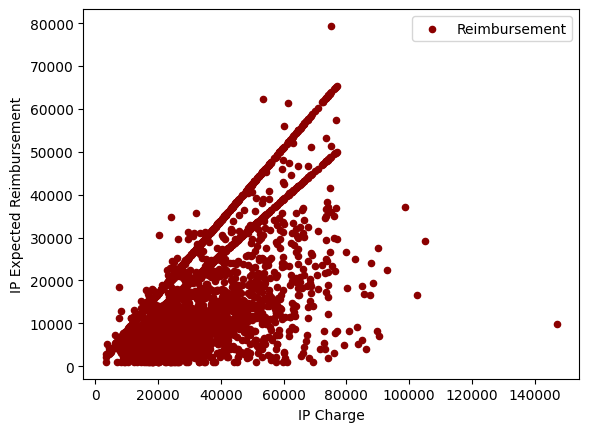

In [13]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

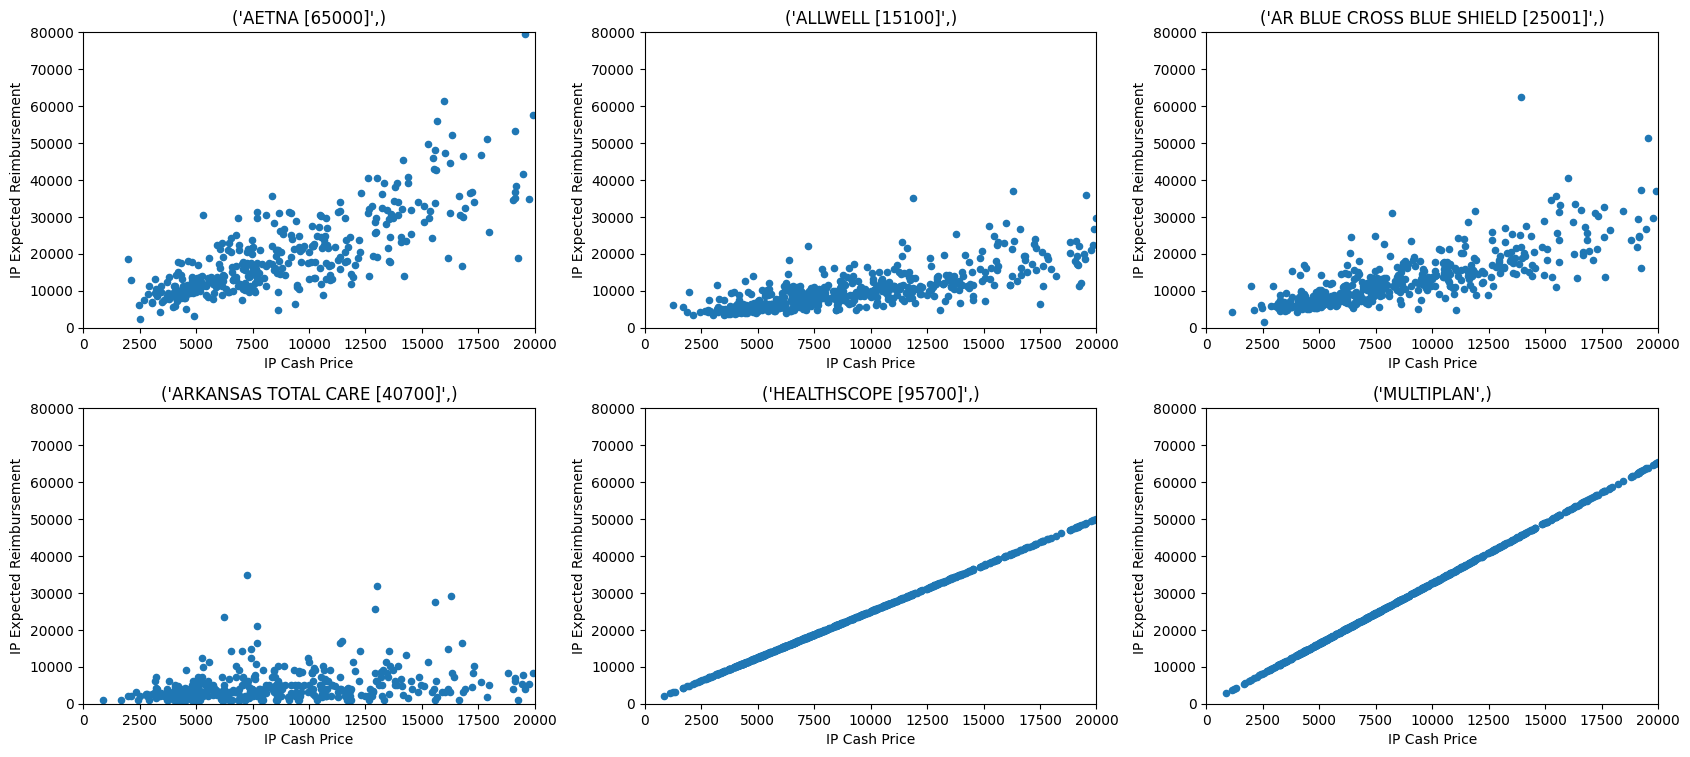

In [14]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

### YOUR RESPONSE:

From these scatterplots, there are noticeable disparities between the relationship between insurance reimbursement and cash price in various insurance providers. The two data points for Healthscope and Multiplan, look practically identical to straight up diagonal lines which is indicative of perfect positive relationship where they both reimburse at a fixed multiple of the cash prices. In this case the results are more diverse and we can observe positive correlation between reimbursements and cash prices but, at the same time, considerable fluctuations which suggest that AETNA, Allwell, and AR Blue Cross Blue Shield have less rigid connections between their reimbursements and the prices in cash. Arkansas Total Care has the least concentrated spatial distribution map with reimbursements lower than the cash prices for all services, meaning that the payments done by this agency may be least linked with the cash price and may have uniformity in the payment across services. The first scatter plot (in red) for the correlation between IP Charge and Expected Reimbursement has wide spread data points with several trends that define more than one linear line suggesting that different insurance companies or reimbursement systems may apply different equations for setting reimbursements from charges.




---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [15]:
# Your code here to load data...
import pandas as pd
df = pd.read_csv("/content/Nutrition__Physical_Activity__and_Obesity_-_American_Community_Survey.csv")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52],
 [Text(0, 0, 'Alaska'),
  Text(1, 0, 'Alabama'),
  Text(2, 0, 'Arkansas'),
  Text(3, 0, 'Arizona'),
  Text(4, 0, 'California'),
  Text(5, 0, 'Colorado'),
  Text(6, 0, 'Connecticut'),
  Text(7, 0, 'District of Columbia'),
  Text(8, 0, 'Delaware'),
  Text(9, 0, 'Florida'),
  Text(10, 0, 'Georgia'),
  Text(11, 0, 'Hawaii'),
  Text(12, 0, 'Iowa'),
  Text(13, 0, 'Idaho'),
  Text(14, 0, 'Illinois'),
  Text(15, 0, 'Indiana'),
  Text(16, 0, 'Kansas'),
  Text(17, 0, 'Kentucky'),
  Text(18, 0, 'Louisiana'),
  Text(19, 0, 'Massachusetts'),
  Text(20, 0, 'Maryland'),
  Text(21, 0, 'Maine'),
  Text(22, 0, 'Michigan'),
  Text(23, 0, 'Minnesota'),
  Text(24, 0, 'Missouri'),
  Text(25, 0, 'Mississi

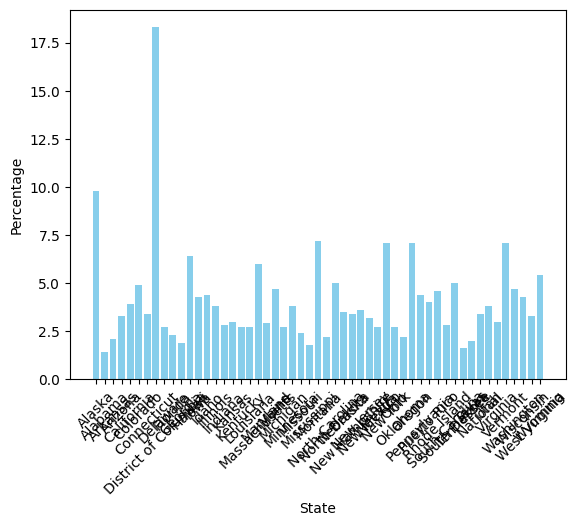

In [16]:
# Your code here to do a first visualization...
bars = plt.bar(df['LocationDesc'], df['Data_Value'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

### Observations #1

This plot displays the percentage of people biking/walking to work in 2010 divided by states; the part of the bar is in light blue. The bar chart illustrates values that are out of range easily: District of Columbia percentage is scaled near 17.5%, Alaska is nearly 10%, while other states have less than 5%. All bars are aligned and have their x-axis label, while state names are rotated to enhance readability, and present percentage information marked on the y-axis to the extent of up to 17.5 per cent.

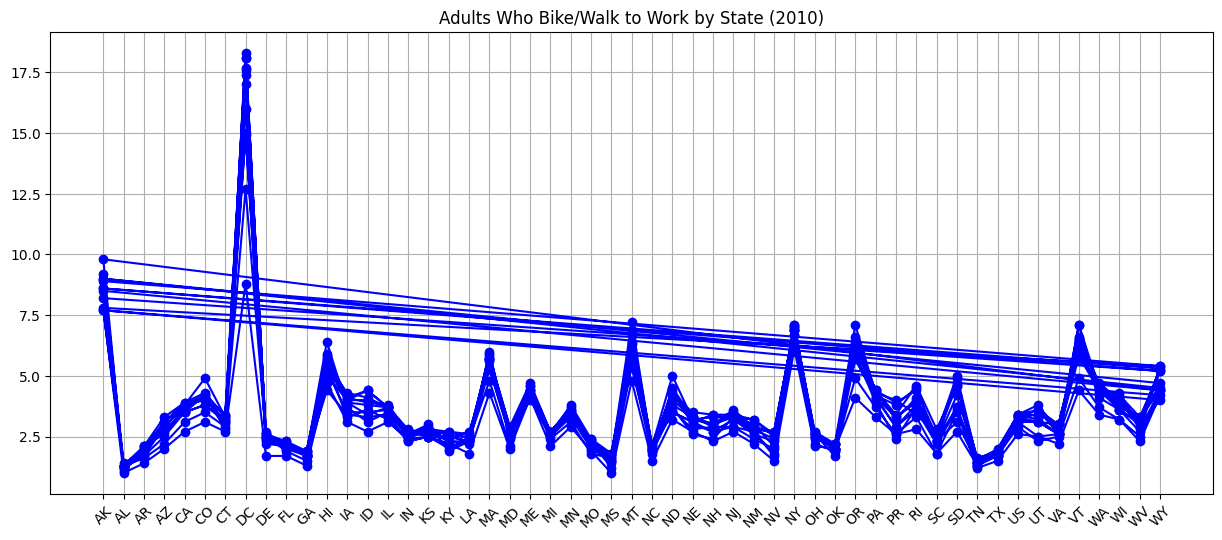

In [17]:
# More code here to do a second visualization...
plt.figure(figsize=(15, 6))
plt.plot(df['LocationAbbr'], df['Data_Value'], 'bo-')
plt.title('Adults Who Bike/Walk to Work by State (2010)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Observations #2

This plot is the same as a regular line plot, but each state is represented by multiple overlapping blue lines that connect the data points. This plot superimposes an appropriate grid pattern at the background and has the same ‘spike’ for DC and Alaska, but different and overlapping lines for each state, perhaps indicating some measures of the error or multiple collected measurements, so that while telling the same overall ‘story’ of DC and Alaska being far ahead in biking/walking commuters, this plot gives more nuanced view of the differences between states.



---



## Submitting Your Work

As usual, submit your work using the "Save to GitHub" option